# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
import json
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
city_name = []
cloudiness = []
country = []
humidity = []
latitude = []
longitude = []
max_temp = []
date = []
wind_speed = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval")
print("---------------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter +1
        
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("---------------------------------")
print("Data Retrevial Complete")
print("---------------------------------")



Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | prince rupert
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 5 of Set 1 | raga
Processing Record 6 of Set 1 | kupang
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | port augusta
Processing Record 12 of Set 1 | rundu
Processing Record 13 of Set 1 | pahrump
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | saskylakh
City not found. Skipping...
Processing Record 16 of Set 1 | pochutla
Processing Record 17 of Set 1 | pierre
Processing Record 18 of Set 1 | kamenka
City not found. Skipping...
Processing Record 19 of Set 1 | dwarka
Processing Record 20 of Set 1 | mataura
City not found. Skip

Processing Record 38 of Set 4 | nishihara
Processing Record 39 of Set 4 | thung song
Processing Record 40 of Set 4 | khasan
Processing Record 41 of Set 4 | abu dhabi
Processing Record 42 of Set 4 | grand gaube
City not found. Skipping...
Processing Record 43 of Set 4 | mount isa
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | xuanhua
Processing Record 46 of Set 4 | nsoko
Processing Record 47 of Set 4 | bathsheba
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | havelock
Processing Record 50 of Set 4 | caravelas
Processing Record 0 of Set 5 | katsuura
Processing Record 1 of Set 5 | santa rosa
Processing Record 2 of Set 5 | iwanai
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | jarocin
Processing Record 6 of Set 5 | concepcion del oro
Processing Record 7 of Set 5 | baykit
Processing Record 8 of Set 5 | ponta do sol
Processing Record 9 of Set 5 | constitucion
Processing Record

Processing Record 26 of Set 8 | tokur
Processing Record 27 of Set 8 | tahe
Processing Record 28 of Set 8 | pisco
City not found. Skipping...
Processing Record 29 of Set 8 | sur
Processing Record 30 of Set 8 | molina
Processing Record 31 of Set 8 | villarrica
Processing Record 32 of Set 8 | mporokoso
City not found. Skipping...
Processing Record 33 of Set 8 | kasongo
Processing Record 34 of Set 8 | termiz
Processing Record 35 of Set 8 | zhuhai
Processing Record 36 of Set 8 | genhe
Processing Record 37 of Set 8 | bilma
Processing Record 38 of Set 8 | ballarat
City not found. Skipping...
Processing Record 39 of Set 8 | kongwa
City not found. Skipping...
Processing Record 40 of Set 8 | berlevag
City not found. Skipping...
Processing Record 41 of Set 8 | aden
Processing Record 42 of Set 8 | kavaratti
Processing Record 43 of Set 8 | shelburne
Processing Record 44 of Set 8 | vanimo
Processing Record 45 of Set 8 | acari
Processing Record 46 of Set 8 | okhotsk
Processing Record 47 of Set 8 | mi

Processing Record 7 of Set 12 | turukhansk
Processing Record 8 of Set 12 | cabinda
Processing Record 9 of Set 12 | sinnamary
Processing Record 10 of Set 12 | jutai
Processing Record 11 of Set 12 | rehoboth
Processing Record 12 of Set 12 | tiznit
Processing Record 13 of Set 12 | novyy urgal
Processing Record 14 of Set 12 | vasteras
---------------------------------
Data Retrevial Complete
---------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#creating data frame
city_data = pd.DataFrame({
        "City" : city_name,
        "Lat" : latitude,
        "Lng" : longitude,
        "Max Temp" : max_temp,
        "Humidity" : humidity,
        "Cloudiness" : cloudiness,
        "Wind Speed" : wind_speed,
        "Country" : country,
        "Date" : date
})


In [6]:
#display dataframe
city_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Prince Rupert,54.3161,-130.3201,49.69,72,100,5.75,CA,1635103817
1,Rikitea,-23.1203,-134.9692,74.70,72,23,17.83,PF,1635103919
2,Tuktoyaktuk,69.4541,-133.0374,30.20,93,75,2.30,CA,1635103920
3,Ushuaia,-54.8000,-68.3000,33.46,80,75,39.12,AR,1635103920
4,Raja,8.4596,25.6780,73.99,85,59,2.80,SS,1635103921
5,Kupang,-10.1667,123.5833,78.96,82,41,3.38,ID,1635103921
6,Port Alfred,-33.5906,26.8910,60.51,70,22,11.45,ZA,1635103772
7,Lüderitz,-26.6481,15.1594,62.98,59,0,16.15,NA,1635103373
8,Norman Wells,65.2820,-126.8329,23.04,93,90,4.61,CA,1635103086
9,Hobart,-42.8794,147.3294,48.06,76,75,1.01,AU,1635103809


In [7]:

#Display the DataFrame
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Prince Rupert,54.3161,-130.3201,49.69,72,100,5.75,CA,1635103817
1,Rikitea,-23.1203,-134.9692,74.70,72,23,17.83,PF,1635103919
2,Tuktoyaktuk,69.4541,-133.0374,30.20,93,75,2.30,CA,1635103920
3,Ushuaia,-54.8000,-68.3000,33.46,80,75,39.12,AR,1635103920
4,Raja,8.4596,25.6780,73.99,85,59,2.80,SS,1635103921
...,...,...,...,...,...,...,...,...,...
570,Jutaí,-5.1833,-68.9000,90.14,55,97,2.73,BR,1635104080
571,Rehoboth,-23.3167,17.0833,69.58,22,0,9.31,NA,1635104081
572,Tiznit Province,29.5833,-9.5000,66.09,63,100,1.81,MA,1635103797
573,Novyy Urgal,51.0736,132.5642,27.32,96,19,2.06,RU,1635104081


In [8]:
#export to CSV file

city_data.to_csv("/Users/prajesh/Desktop/Class_Activity/Python_APIs/gt-virt-atl-data-pt-09-2021-u-c/02-Homework/06-Python-APIs/Instructions/output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
test_humidity = city_data["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")

test_humidity

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    575.000000
mean      72.994783
std       19.394986
min       10.000000
25%       63.500000
50%       76.000000
75%       87.500000
max      100.000000
Name: Humidity, dtype: float64

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

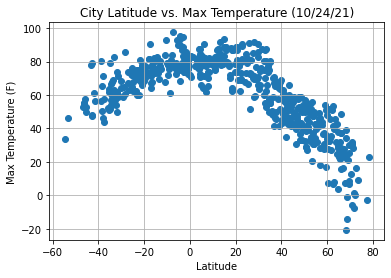

In [12]:
#Size for the plotter charts
#plt.figure(figsize = (10,8))

#Apply type, dta, and configuration for visualization/graph
plt.scatter(latitude,max_temp, linewidth=1, marker="o")

#Create the labels for the chart
plt.title("City Latitude vs. Max Temperature (%s)" %time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Export graph to the image folder
plt.savefig("/Users/prajesh/Desktop/Class_Activity/Python_APIs/gt-virt-atl-data-pt-09-2021-u-c/02-Homework/06-Python-APIs/Instructions/Images/Fig1.png")

## Latitude vs. Humidity Plot

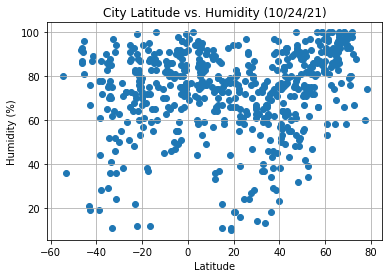

In [13]:
#Size for the plotter charts
#plt.figure(figsize = (10,8))

#Apply type, dta, and configuration for visualization/graph
plt.scatter(latitude,humidity, linewidth=1, marker="o")

#Create the labels for the chart
plt.title("City Latitude vs. Humidity (%s)" %time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Export graph to the image folder
plt.savefig("/Users/prajesh/Desktop/Class_Activity/Python_APIs/gt-virt-atl-data-pt-09-2021-u-c/02-Homework/06-Python-APIs/Instructions/Images/Fig2.png")

The Humidity vs. Latitude plot shown above, wich contains data from all cities. We can see that temps rise as we near 0 latitude. 


## Latitude vs. Cloudiness Plot

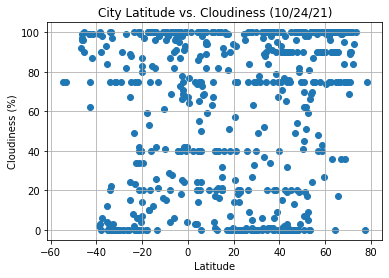

In [14]:
#Size for the plotter charts
#plt.figure(figsize = (10,8))

#Apply type, dta, and configuration for visualization/graph
plt.scatter(latitude,cloudiness, linewidth=1, marker="o")

#Create the labels for the chart
plt.title("City Latitude vs. Cloudiness (%s)" %time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Export graph to the image folder
plt.savefig("/Users/prajesh/Desktop/Class_Activity/Python_APIs/gt-virt-atl-data-pt-09-2021-u-c/02-Homework/06-Python-APIs/Instructions/Images/Fig3.png")

The above plot chart is between Cloudiness Vs Latitude. There seem to be some values of cloudiness that points cluster along mainly around 0, 20, 40, 75, 90, and 100.

## Latitude vs. Wind Speed Plot

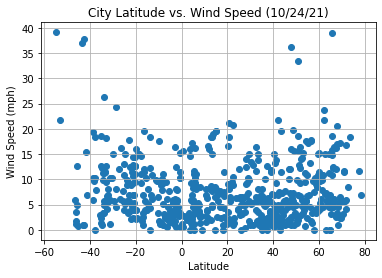

In [15]:
#Size for the plotter charts
#plt.figure(figsize = (10,8))

#Apply type, dta, and configuration for visualization/graph
plt.scatter(latitude,wind_speed, linewidth=1, marker="o")

#Create the labels for the chart
plt.title("City Latitude vs. Wind Speed (%s)" %time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#Export graph to the image folder
plt.savefig("/Users/prajesh/Desktop/Class_Activity/Python_APIs/gt-virt-atl-data-pt-09-2021-u-c/02-Homework/06-Python-APIs/Instructions/Images/Fig4.png")

The Above scatter plot is between Wind Speed Vs Latitude. It seems like there is no clear pattern for the wind speed measured at distances from the equator. 

## Linear Regression

In [16]:
northern_hem = city_data.loc[(city_data['Lat']>0 )]
southern_hem = city_data.loc[(city_data['Lat']< 0 )]

northern_hem.count()

City          385
Lat           385
Lng           385
Max Temp      385
Humidity      385
Cloudiness    385
Wind Speed    385
Country       385
Date          385
dtype: int64

In [17]:
southern_hem.count()

City          190
Lat           190
Lng           190
Max Temp      190
Humidity      190
Cloudiness    190
Wind Speed    190
Country       190
Date          190
dtype: int64

In [18]:
def line_reg(x,y,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_equator = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    print(f'The r-value is {rvalue}')
    print(line_equator)
    plt.annotate(line_equator,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8720871297016541
y = -0.97x + 93.08


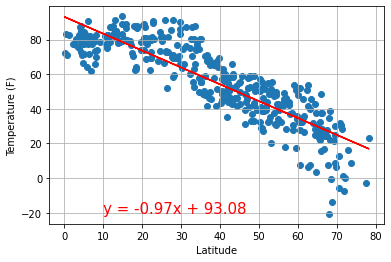

In [19]:
x = northern_hem['Lat']
y = northern_hem['Max Temp']
regEQplotX = 10
regEQplotY = -20
y_label = "Temperature (F)"
line_reg(x,y,regEQplotX,regEQplotY,y_label)

plt.savefig("/Users/prajesh/Desktop/Class_Activity/Python_APIs/gt-virt-atl-data-pt-09-2021-u-c/02-Homework/06-Python-APIs/Instructions/Images/Northern_Temp_Vs_Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.752150279263796
y = 0.62x + 84.09


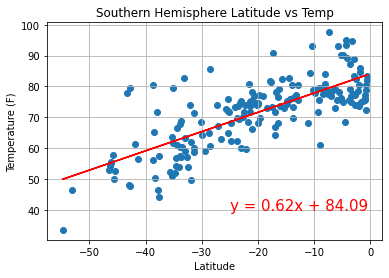

In [20]:
x = southern_hem["Lat"]
y = southern_hem["Max Temp"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp')
line_reg(x,y,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.23038412916055506
y = 0.22x + 65.45


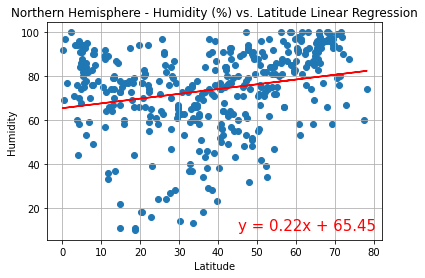

In [21]:
x = northern_hem["Lat"]
y = northern_hem["Humidity"]
regEQplotX = 45
regEQplotY = 10
y_label = "Humidity"
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
line_reg(x,y,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.19209169351873046
y = 0.28x + 77.37


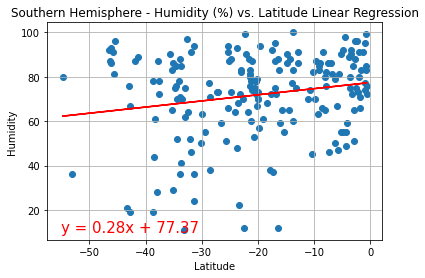

In [22]:
x = southern_hem["Lat"]
y = southern_hem["Humidity"]
regEQplotX = -55
regEQplotY = 10
y_label = "Humidity"
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
line_reg(x,y,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.22940862308857352
y = 0.43x + 44.75


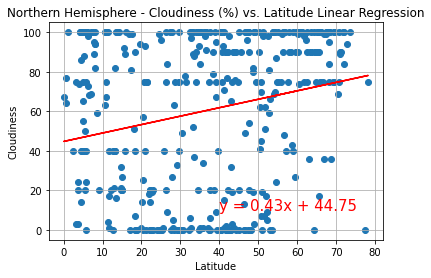

In [23]:
x = northern_hem["Lat"]
y = northern_hem["Cloudiness"]
regEQplotX = 40
regEQplotY = 10
y_label = "Cloudiness"
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
line_reg(x,y,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.17794902660209028
y = 0.53x + 66.27


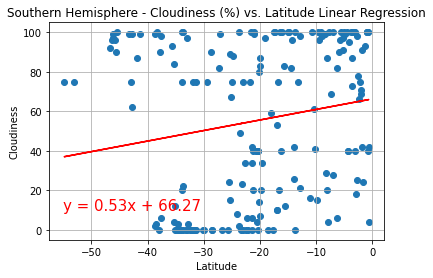

In [24]:
x = southern_hem["Lat"]
y = southern_hem["Cloudiness"]
regEQplotX = -55
regEQplotY = 10
y_label = "Cloudiness"
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
line_reg(x,y,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.15051990124164114
y = 0.04x + 5.57


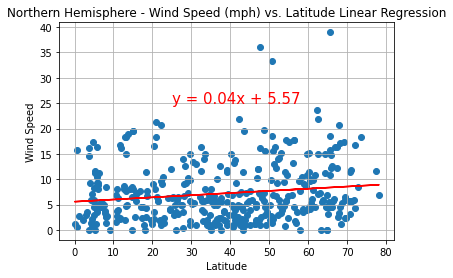

In [25]:
x = northern_hem["Lat"]
y = northern_hem["Wind Speed"]
regEQplotX = 25
regEQplotY = 25
y_label = "Wind Speed"
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
line_reg(x,y,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.32366318248160963
y = -0.16x + 4.91


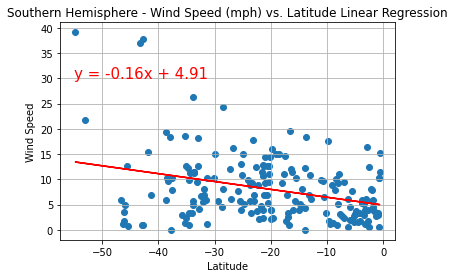

In [26]:
x = southern_hem["Lat"]
y = southern_hem["Wind Speed"]
regEQplotX = -55
regEQplotY = 30
y_label = "Wind Speed"
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
line_reg(x,y,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed.png')
plt.show()